<a href="https://colab.research.google.com/github/SergJoij/CaesarCipherAdvanced/blob/main/Task_1_%D0%91%D0%B0%D1%85%D0%B0%D1%80%D0%B5%D0%B2_%D0%A1%D0%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ новостных данных

**Цель:** разработать систему для парсинга, анализа и визуализации новостных данных, применяя методы числового анализа, обработки текстов (NLP) и теорию графов.


**Критерии оценки:**
- Корректность парсинга данных.
- Точность числового и текстового анализа.
- Качество и наглядность визуализаций.
- Правильное применение теории графов.


In [ ]:
# Установка и подключение библиотек
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
try:
  import pymorphy2
except:
  !pip install pymorphy2
  import pymorphy2

import networkx as nx
from itertools import combinations

try:
  from pyvis.network import Network
except:
  !pip install pyvis
  from pyvis.network import Network

from IPython.display import HTML
from networkx.algorithms import community

import numpy as np
import plotly.express as px
from wordcloud import WordCloud

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 28.0 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=78694248a25622deca10bc2e4b139dcbf99a3a065e4f5abcf9f3e59c9da549cd
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.5 MB/s eta 0:00:00


### Этап 1: Парсинг данных

1. Спарсить данные с выбранного вами новостного сайта за последние 7 дней. Необходимая информация:
   - Заголовок статьи
   - Текст статьи
   - Дата публикации
   - Автор
2. Для парсинга используйте библиотеку `BeautifulSoup` или `Scrapy`.
3. Сохраните данные в формате CSV для дальнейшей обработки.

**Результат:** CSV-файл с полями: заголовок, текст статьи, дата публикации, автор.

---

### Теория и основные понятия

**Парсинг веб-страниц** — это процесс извлечения данных из HTML-кода веб-страниц. В Python для этого используются библиотеки, которые помогают разобрать структуру страницы и извлечь нужные элементы. Также при работе с большими объемами данных нужно учитывать ограничения на частоту запросов, чтобы избежать блокировки со стороны сайта.

Самые популярные библиотеки для парсинга в Python:
1. **BeautifulSoup** — библиотека для синтаксического разбора HTML и XML документов. Она проста в использовании и подходит для большинства задач по извлечению данных из веб-страниц.
2. **Scrapy** — более мощная библиотека для парсинга данных, особенно для работы с большими сайтами.

Дополнительно для хранения и анализа данных удобно использовать **pandas**, которая позволяет легко преобразовывать данные в формат таблиц и сохранять их в различных форматах, таких как CSV.

### Основные шаги парсинга данных

1. **Получение HTML-кода страницы.** Используйте библиотеку `requests`, чтобы загрузить веб-страницу.
2. **Разбор HTML-кода.** Используйте `BeautifulSoup` для преобразования HTML-кода в структуру, с которой можно работать.
3. **Извлечение данных.** Найдите нужные элементы на странице (заголовки, текст, даты и т.д.) с помощью CSS-селекторов или поиска по тегам.
4. **Сохранение данных в DataFrame.** Используйте библиотеку `pandas`, чтобы удобно хранить извлеченные данные в таблице.
5. **Пауза между запросами.** Необходимо делать небольшие задержки (например, 1-2 секунды) между запросами, чтобы избежать блокировки со стороны сайта (такие меры защиты известны как **rate limiting**). Это можно реализовать с помощью библиотеки `time`.

### Пример использования `BeautifulSoup` и `pandas`

```python
# Установка необходимых библиотек
# pip install beautifulsoup4 requests pandas

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# 1. Получение HTML-кода страницы
url = "https://example.com/news"
response = requests.get(url)
html = response.content

# 2. Разбор HTML-кода
soup = BeautifulSoup(html, 'html.parser')

# 3. Извлечение данных
# Найдем все заголовки статей (например, теги <h2> для заголовков)
titles = soup.find_all('h2')
dates = soup.find_all('span', class_='date')

# 4. Сохранение данных в DataFrame
data = []
for i in range(len(titles)):
    title = titles[i].text
    date = dates[i].text if i < len(dates) else 'No date'  # Защита от отсутствия даты
    data.append([title, date])

# Создание DataFrame
df = pd.DataFrame(data, columns=['Title', 'Date'])

# Сохранение в CSV
df.to_csv('news_data.csv', index=False)

print("Данные успешно сохранены в 'news_data.csv'")

# 5. Пауза между запросами
# Если требуется спарсить несколько страниц, сделайте паузу между запросами
time.sleep(2)  # Пауза на 2 секунды между запросами
```

### Пауза между запросами

Когда вы отправляете несколько последовательных запросов к сайту, особенно если парсите большие объемы данных, важно делать паузы между запросами. Это делается для:
1. **Избежания блокировки.** Многие сайты имеют ограничения на количество запросов в минуту (rate limiting). Если отправить слишком много запросов за короткое время, сайт может заблокировать ваш IP-адрес.
2. **Снижения нагрузки на сервер.** Постоянные запросы могут нагружать сервер, что приведет к снижению производительности сайта.

Используйте библиотеку `time`, чтобы делать паузы между запросами. Обычно достаточно 1-2 секунд задержки между запросами.

### Основные методы `BeautifulSoup`
- `find()` — находит первый элемент, соответствующий запросу.
- `find_all()` — находит все элементы, соответствующие запросу.
- `select()` — находит элементы по CSS-селекторам (например, `soup.select('div.class_name')`).

### Полезные ссылки для изучения
1. Официальная документация:
   - **BeautifulSoup:** [https://www.crummy.com/software/BeautifulSoup/bs4/doc/](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
   - **pandas:** [https://pandas.pydata.org/](https://pandas.pydata.org/)
   - **requests:** [https://docs.python-requests.org/en/latest/](https://docs.python-requests.org/en/latest/)

2. Пример работы с BeautifulSoup: [https://realpython.com/beautiful-soup-web-scraper-python/](https://realpython.com/beautiful-soup-web-scraper-python/)

### Пример задачи для самостоятельного выполнения
1. Спарсить новости с выбранного вами сайта (например, `https://news.sarbc.ru/`).
2. Извлечь заголовки, ссылки на статьи и даты публикаций.
3. Сохранить данные в CSV-файл с использованием `pandas`.

```python
# Установка необходимых библиотек:
# pip install beautifulsoup4 requests pandas

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# URL страницы
url = "https://news.sarbc.ru/"
response = requests.get(url)

# Проверка успешности запроса
if response.status_code == 200:
    # Разбор HTML-кода страницы
    soup = BeautifulSoup(response.content, 'html.parser')

    # Найдем <ul> с классом "near-list" и все <li> внутри этого <ul>
    ul_element = soup.find('ul', class_='near-list')
    articles = ul_element.find_all('li') if ul_element else []

    # Сбор данных
    data = []
    for article in articles:
        # Время публикации
        time_published = article.find('div', class_='item-time-time')
        time_published = time_published.text.strip() if time_published else 'Нет времени'

        # Категория новости
        category = article.find('div', class_='item-rubrics')
        category = category.text.strip() if category else 'Нет категории'

        # Заголовок статьи
        title_tag = article.find('div', class_='item-title')
        title = title_tag.text.strip() if title_tag else 'Нет заголовка'

        # Ссылка на статью
        link_tag = title_tag.find('a') if title_tag else None
        link = f"https:{link_tag['href']}" if link_tag else 'Нет ссылки'

        # Добавляем данные в список
        data.append([time_published, category, title, link])

    # Создание DataFrame с помощью pandas
    df = pd.DataFrame(data, columns=['Time Published', 'Category', 'Title', 'Link'])

    # Сохранение данных в CSV
    df.to_csv('sarbc_news_data.csv', index=False)

    print("Данные успешно сохранены в 'sarbc_news_data.csv'")

    # Пауза между запросами (если нужно собирать данные с других страниц)
    time.sleep(2)

else:
    print(f"Не удалось получить доступ к сайту. Код ответа: {response.status_code}")

# Вывод результатов в табличном виде
df
```

## Реализация этапа 1

In [ ]:
# Ваша реализация 1-го этапа
# Для одного из российсских новостных сайтов напиши скрипт извлекающий: Заголовок статьи, Текст статьи, Дата публикации и Автор.
# Сохраните результат в DataFrame используя библиотеку Pandas.
save_file_1 = "darkside_news_data.csv"
main_page = "https://www.darkside.ru"

month_dict = {"дек": 12,
              "ноя": 11,
              "окт": 10,
              "сен": 9}

current_date = date.today()
past_date = current_date - timedelta(days=7) # 7 дней назад

In [ ]:
def to_date(pdate): # переводит строку в формат даты: "1 ноя 2024" -> 2024-11-1
  t = list(item for item in pdate.split(' '))
  if len(t) > 3:
    for i in t:
      if i == '' or i == ' ':
        t.remove(i)
  t[1] = month_dict[t[1]] # замена на номер месяца int

  date_object_full = datetime(int(t[2]), t[1], int(t[0])).date()
  return date_object_full

Парсинг

In [ ]:
cp = 0  # для пролистывания страниц с новостями
breakall = False
data = []
while True:
  website = f"https://www.darkside.ru/news/index.phtml?cp={cp}"
  response = requests.get(website)
  html = response.content

  # 2. Разбор HTML-кода
  soup = BeautifulSoup(html, 'html.parser')

  # 3. Извлечение данных
  # все заголовки статей и все даты
  titles = soup.find_all(class_ = "news-item-table")
  dates = soup.find_all("font", color="#82260B")

  # 4. Сохранение данных в DataFrame
  for i in range(len(titles)):
      # заголовок
      title = titles[i].find("h1").text
      # дата
      if i < len(dates):
        if dates[i].text == "сегодня":
          date = current_date
        else:
          date = to_date(dates[i].text)
          if date < past_date: # если мы вышли за пределы наших 7 дней, то останавливаем
            breakall = True
            break
      else: date = 'No date'  # Защита от отсутствия даты
      # ссылка
      href = main_page + titles[i].find("a")["href"]
      # добавляем элементы в data
      data.append([title,date,href])

    # 5. Пауза между запросами
  time.sleep(2)  # Пауза на 2 секунды между запросами

  # 6(спец). Подготовка к переходу на другую страницу
  response.close()
  if breakall: # если мы вышли за пределы наших 7 дней, то останавливаем
    break
  cp += 30  # на каждую страницу - по 30 новостей
  if cp > 1000:   # на всякий случай, если страниц слишком много - стоп!
    break

# Создание DataFrame
df = pd.DataFrame(data, columns=['Title','Date','Link'])
# Сохранение в CSV
df.to_csv(save_file_1, index=False)
print(f"Данные со страницы успешно сохранены в {save_file_1}")

Данные со страницы успешно сохранены в darkside_news_data.csv


## Этап 2: Анализ числовых данных

1. Проведите анализ категорий новостей: выясните, какие категории новостей преобладают в собранных данных.
2. Создайте визуализацию данных: постройте графики для анализа распределения новостей по времени публикации и категориям.
3. Подготовьте отчет с основными выводами на основе числового анализа.


**Результат:** Гистограмма частот ключевых тем, график распределения новостей по времени.

---

Анализ числовых данных — ключевой этап в обработке данных, который позволяет извлечь важную информацию и выявить закономерности. В рамках этого этапа вы будете работать с данными, которые были собраны на первом этапе, и проводить их анализ с помощью различных методов статистики и машинного обучения.

### 1. Подготовка данных

На этом этапе важно убедиться, что данные правильно загружены и подготовлены к анализу. Убедитесь, что в датасете нет пропущенных значений в важных столбцах, таких как время публикации или категория новости. Например, с помощью библиотеки `pandas` можно легко проверять и обрабатывать пропущенные значения.

Пример:

```python
import pandas as pd

# Загрузка данных
df = pd.read_csv('sarbc_news_data.csv')

# Проверка на пропущенные значения
print(df.isnull().sum())

# Заполнение пропущенных значений
df.fillna('Нет данных', inplace=True)

# Проверка итогов
print(df.head())
```

### 2. Статистический анализ

Основные статистические методы анализа данных включают:

- **Описательные статистики**: Позволяют получить представление о распределении данных. С помощью метода `.describe()` можно быстро получить среднее, стандартное отклонение и другие характеристики числовых столбцов.

Пример:

```python
# Применение описательной статистики
print(df.describe())
```

- **Группировка данных**: Важно уметь группировать данные для получения сводных таблиц. Например, можно сгруппировать статьи по категориям или времени публикации.

Пример:

```python
# Группировка данных по категориям новостей
category_counts = df.groupby('Category').size()
print(category_counts)
```

### 3. Визуализация данных

Для понимания числовых данных важно визуализировать результаты анализа. Популярные методы визуализации включают гистограммы, графики распределения и диаграммы.

Пример создания столбчатой диаграммы для визуализации количества новостей по категориям:

```python
import matplotlib.pyplot as plt

# Визуализация количества новостей по категориям
category_counts.plot(kind='bar')
plt.title('Количество новостей по категориям')
plt.xlabel('Категории')
plt.ylabel('Количество новостей')
plt.show()
```

### 4. Ссылки на материалы

Для более глубокого понимания анализа числовых данных рекомендую ознакомиться с официальной документацией и учебными материалами:

- [Документация по библиотеке pandas](https://pandas.pydata.org/docs/)
- [Руководство по статистическим методам в Python](https://realpython.com/python-statistics/)
- [Визуализация данных с matplotlib](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)


## Реализация этапа 2

In [ ]:
# Ваша реализация 2-го этапа
# Загрузка данных
df = pd.read_csv('darkside_news_data.csv')

# Проверка на пропущенные значения
print(df.isnull().sum())

Title    0
Date     0
Link     0
dtype: int64


Пропусков нет

In [ ]:
# Проверка итогов
df.head()

,Title,Date,Link
0,Картины на основе риффов TONY MACALPINE,2024-10-06,https://www.darkside.ru/news/167504/
1,Вокалист MR. BIG хочет сдать назад,2024-10-06,https://www.darkside.ru/news/167517/
2,Басист SYSTEM OF A DOWN: «Мы не ссорились!»,2024-10-06,https://www.darkside.ru/news/167518/
3,DUFF MCKAGAN открыл тур,2024-10-06,https://www.darkside.ru/news/167519/
4,"MAYNARD JAMES KEENAN, BILLY IDOL и JELLY ROLL ...",2024-10-06,https://www.darkside.ru/news/167520/


In [ ]:
# Применение описательной статистики
df.describe()

,Title,Date,Link
count,228,228,228
unique,225,8,228
top,Профессиональное видео с выступления METALLICA,2024-10-02,https://www.darkside.ru/news/167504/
freq,3,33,1


Видимо, существуют одинаковые заголовки статей. При том, что сами новостные страницы - разные (т.к. ссылки все уникальные). Посмотрим на эти новости.

In [ ]:
ids = df["Title"]
df[ids.isin(ids[ids.duplicated()])]

,Title,Date,Link
11,Профессиональное видео с выступления METALLICA,2024-10-06,https://www.darkside.ru/news/167560/
44,Акустика от TERAMAZE,2024-10-05,https://www.darkside.ru/news/167569/
122,Профессиональное видео с выступления METALLICA,2024-10-02,https://www.darkside.ru/news/167452/
155,Профессиональное видео с выступления METALLICA,2024-10-01,https://www.darkside.ru/news/167420/
194,Акустика от TERAMAZE,2024-09-30,https://www.darkside.ru/news/167363/


Рассмотрим количество статей по датам

In [ ]:
frequency = df['Date'].value_counts()
print(frequency)

Date
2024-10-02    33
2024-10-03    32
2024-10-04    31
2024-10-01    31
2024-10-05    30
2024-09-30    29
2024-09-29    27
2024-10-06    15
Name: count, dtype: int64


In [ ]:
df.groupby('Date').describe()

Title                                                            \
           count unique                                                top   
Date                                                                         
2024-09-29    27     27         KID ROCK не боится озвучивать свои взгляды   
2024-09-30    29     29                Новое видео THE BLACK DAHLIA MURDER   
2024-10-01    31     31                                 Новое видео VUKOVI   
2024-10-02    33     33   Гитарист SLIPKNOT: «Очень важно работать вместе»   
2024-10-03    32     32  MIKE PORTNOY о первом концерте с DREAM THEATER...   
2024-10-04    31     31                           Новое видео TIERRA SANTA   
2024-10-05    30     30  Будут ли CAVALERA перезаписывать еще альбомы S...   
2024-10-06    15     15            Картины на основе риффов TONY MACALPINE   

                 Link                                                    
           freq count unique                                   top freq  
Date                                                                     
2024-09-29    1    27     27  https://www.darkside.ru/news/167182/    1  
2024-09-30    1    29     29  https://www.darkside.ru/news/167409/    1  
2024-10-01    1    31     31  https://www.darkside.ru/news/167417/    1  
2024-10-02    1    33     33  https://www.darkside.ru/news/167483/    1  
2024-10-03    1    32     32  https://www.darkside.ru/news/167500/    1  
2024-10-04    1    31     31  https://www.darkside.ru/news/167544/    1  
2024-10-05    1    30     30  https://www.darkside.ru/news/167551/    1  
2024-10-06    1    15     15  https://www.darkside.ru/news/167504/    1

In [ ]:
frequency.values

array([33, 32, 31, 31, 30, 29, 27, 15])

Визуализация

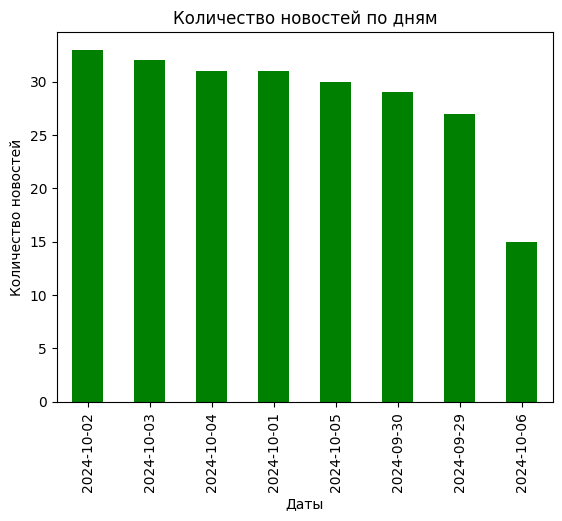

In [ ]:
# Визуализация количества новостей по категориям
frequency.plot(kind='bar', color='green')
plt.title('Количество новостей по дням')
plt.xlabel('Даты')
plt.ylabel('Количество новостей')
plt.show()

## Этап 3: Анализ текстовых данных (NLP)

1. Предобработка текстов: Токенизируйте заголовки новостей, удалите стоп-слова и выполните лемматизацию.
2. Частотный анализ: Проведите частотный анализ лемматизированных слов, выявите ключевые слова.
3. Векторизация текстов: Примените TF-IDF векторизацию к заголовкам новостей.
4. Тематический анализ: Используя LDA, выделите основные темы в новостных заголовках.

**Результат:** Таблицы и выводы по данным.

---

### Теоретический блок

Анализ текстовых данных (или обработка естественного языка, **NLP**) — это один из важнейших аспектов работы с большими данными, позволяющий извлекать информацию и делать выводы на основе текстовых данных. В этом этапе мы будем работать с заголовками новостей и категориями, используя инструменты NLP для анализа текстов.

NLP включает в себя множество задач: от токенизации (разбиения текста на слова) до классификации и тематического анализа. Для выполнения задач этого этапа будем использовать библиотеки `nltk`, `sklearn`, и `pandas`.

### 1. Токенизация и предобработка текста

Первым шагом в анализе текстовых данных является **токенизация** — процесс разбиения текста на отдельные элементы (слова). После этого необходимо выполнить нормализацию текста: приведение слов к нижнему регистру, удаление стоп-слов (малозначимых слов) и знаков препинания.

Пример предобработки текста с использованием библиотеки `nltk`:

```python
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Загрузка новостей из файла
df = pd.read_csv('sarbc_news_data.csv')

# Загрузка данных nltk
nltk.download('punkt')
nltk.download('stopwords')

# Функция предобработки текста
def preprocess_text(text):
    # Приведение к нижнему регистру
    text = text.lower()
    
    # Токенизация
    tokens = word_tokenize(text)
    
    # Удаление стоп-слов и знаков препинания
    stop_words = set(stopwords.words('russian'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    
    return tokens

# Применение предобработки к заголовкам новостей
df['Preprocessed_Title'] = df['Title'].apply(preprocess_text)
print(df[['Title', 'Preprocessed_Title']].head())
```

### 2. Лемматизация

**Лемматизация** — это процесс приведения слова к его начальной форме (лемме), что позволяет лучше анализировать текст, не учитывая различные формы одного и того же слова. В русском языке лемматизация особенно важна для качественного анализа.

Пример лемматизации с использованием библиотеки `pymorphy2`:

```python
import pymorphy2

# Инициализация лемматизатора
morph = pymorphy2.MorphAnalyzer()

# Функция для лемматизации
def lemmatize_tokens(tokens):
    return [morph.parse(token)[0].normal_form for token in tokens]

# Применение лемматизации к токенизированным заголовкам
df['Lemmatized_Title'] = df['Preprocessed_Title'].apply(lemmatize_tokens)
print(df[['Title', 'Lemmatized_Title']].head())
```

### 3. Частотный анализ

Частотный анализ позволяет определить, какие слова встречаются чаще всего в тексте. Это полезно для выявления ключевых тем и концепций в новостных заголовках.

Пример частотного анализа с использованием `nltk`:

```python
from collections import Counter

# Функция для вычисления частоты слов
def get_word_frequencies(tokens_list):
    all_tokens = [token for tokens in tokens_list for token in tokens]
    return Counter(all_tokens)

# Вычисление частоты слов
word_frequencies = get_word_frequencies(df['Lemmatized_Title'])
print(word_frequencies.most_common(5))  # Вывод 5 самых частых слов
```

### 4. Векторизация текста (TF-IDF)

Для анализа текста в машинном обучении и построении моделей важным шагом является **векторизация текста**, которая переводит текстовые данные в числовые. Один из самых популярных методов векторизации — это **TF-IDF** (Term Frequency-Inverse Document Frequency).

Пример использования TF-IDF с библиотекой `scikit-learn`:

```python
from sklearn.feature_extraction.text import TfidfVectorizer

# Преобразование лемматизированных заголовков в строковый формат для TF-IDF
df['Lemmatized_Title_Str'] = df['Lemmatized_Title'].apply(lambda x: ' '.join(x))

# Инициализация TF-IDF векторизатора
vectorizer = TfidfVectorizer()

# Преобразование заголовков в TF-IDF векторы
X = vectorizer.fit_transform(df['Lemmatized_Title_Str'])

# Вывод первых пяти заголовков в виде векторов
print(vectorizer.get_feature_names_out())
print(X.toarray()[:5])
```

### 5. Тематическое моделирование (LDA)

Для обнаружения тем в тексте можно использовать метод **Latent Dirichlet Allocation (LDA)**. Этот метод позволяет разделить коллекцию документов на несколько тем, основанных на распределении слов в тексте.

Пример использования LDA с библиотекой `gensim`:

```python
from gensim import corpora
from gensim.models import LdaModel

# Подготовка данных для LDA
texts = df['Lemmatized_Title'].tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Построение LDA модели
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

# Вывод двух тем
topics = lda_model.print_topics(num_words=3)
for topic in topics:
    print(topic)
```

### 6. Ссылки на материалы

- [Документация по nltk](https://www.nltk.org/)
- [Введение в LDA на русском языке](https://habr.com/ru/post/334210/)
- [Обзор TF-IDF на sklearn](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting)



## Реализация этапа 3

In [ ]:
# Ваша реализация 3-го этапа
# Загрузка новостей из файла
df = pd.read_csv(save_file_1)

# Загрузка данных nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def custom_tokenize(text):  # здесь происходит само разделение
    # Регулярное выражение для поиска последовательностей слов в верхнем регистре
    # и разделённых знаком / (AC/DC)
    # pattern = r'\b[A-Z](?:[A-Z/\s]*)[A-Z]\b|[^\s]+'
    # pattern = r"[a-zA-Zа-яА-Я0-9ÄÖäöёЁ'&-]+"
    # pattern = r'\b[A-ZÄÖÜ](?:[A-ZÄÖÜ/\s\.\-&\']*)[A-ZÄÖÜ]\b|[^\s]+'
    pattern = r'\b[a-zäöüA-ZÄÖÜ](?:[a-zäöüA-ZÄÖÜ/\s\.\-&\']*)[a-zäöüA-ZÄÖÜ]\b|[^\s]+'

    # Находим все совпадения по паттерну
    tokens = re.findall(pattern, text)
    return tokens # возвращает токены с полными названиями групп/людей

In [ ]:
preprocess_exeptions = ("AC/DC", "GEOFF TATE")

In [ ]:
def have_a_space(text): # проверяет, имеется ли в строке хоть один пробел
  for char in text:
    if char == ' ':
      return True
  return False

In [ ]:
def exeption(word):
  if word in preprocess_exeptions:
    return True
  return False

In [ ]:
# Функция предобработки текста
def preprocess_text(text):
    # Приведение к нижнему регистру
    # text = text.lower()

    # Токенизация
    tokens = custom_tokenize(text)
    print(tokens)

    # Удаление стоп-слов и знаков препинания
    stop_words = set(stopwords.words('russian'))
    tokens = [word for word in tokens if (word.isalnum() or have_a_space(word) or exeption(word)) and word not in stop_words]
    return tokens

In [ ]:
# Применение предобработки к заголовкам новостей
df['Preprocessed_Title'] = df['Title'].apply(preprocess_text)

['Картины', 'на', 'основе', 'риффов', 'TONY MACALPINE']
['Вокалист', 'MR. BIG', 'хочет', 'сдать', 'назад']
['Басист', 'SYSTEM OF A DOWN', ':', '«Мы', 'не', 'ссорились!»']
['DUFF MCKAGAN', 'открыл', 'тур']
['MAYNARD JAMES KEENAN', ',', 'BILLY IDOL', 'и', 'JELLY ROLL', 'споют', 'OZZY OSBOURNE']
['12', 'марок', 'THE WHO']
['SOL INVICTO', 'выпускают', 'ЕР']
['Виниловый', 'релиз', 'STONE TEMPLE PILOTS', 'выйдет', 'осенью']
['Новое', 'видео', 'LIKE MOTHS TO FLAMES']
['BECKY BALDWIN', 'исполняет', 'MERCYFUL FATE']
['Вокалист', 'BABYLON A.D', '.', 'вспоминает', 'дебютный', 'альбом']
['Профессиональное', 'видео', 'с', 'выступления', 'METALLICA']
['Концертные', 'клипы', 'RUSH', '1981', 'года']
['Юбилейный', 'винил', 'от', 'AT THE GATES']
['Вокалистка', 'KITTIE', 'выбирает', 'правильный', 'альбом', 'METALLICA']
['Будут', 'ли', 'CAVALERA', 'перезаписывать', 'еще', 'альбомы', 'SEPULTURA', '?']
['OZZY OSBOURNE', ':', 'VAN HALEN', 'убрали', 'BLACK SABBATH', 'со', 'сцены']
['Профессиональное', 'видео'

In [ ]:
df[['Title', 'Preprocessed_Title']].head(10)

,Title,Preprocessed_Title
0,Картины на основе риффов TONY MACALPINE,"[Картины, основе, риффов, TONY MACALPINE]"
1,Вокалист MR. BIG хочет сдать назад,"[Вокалист, MR. BIG, хочет, сдать, назад]"
2,Басист SYSTEM OF A DOWN: «Мы не ссорились!»,"[Басист, SYSTEM OF A DOWN]"
3,DUFF MCKAGAN открыл тур,"[DUFF MCKAGAN, открыл, тур]"
4,"MAYNARD JAMES KEENAN, BILLY IDOL и JELLY ROLL ...","[MAYNARD JAMES KEENAN, BILLY IDOL, JELLY ROLL,..."
5,12 марок THE WHO,"[12, марок, THE WHO]"
6,SOL INVICTO выпускают ЕР,"[SOL INVICTO, выпускают, ЕР]"
7,Виниловый релиз STONE TEMPLE PILOTS выйдет осенью,"[Виниловый, релиз, STONE TEMPLE PILOTS, выйдет..."
8,Новое видео LIKE MOTHS TO FLAMES,"[Новое, видео, LIKE MOTHS TO FLAMES]"
9,BECKY BALDWIN исполняет MERCYFUL FATE,"[BECKY BALDWIN, исполняет, MERCYFUL FATE]"


Лемматизация

In [ ]:
# Инициализация лемматизатора
morph = pymorphy2.MorphAnalyzer()
exept_dict = {"ИИ": "ии", "басиста": "басист", "Боуи": "боуи"}

# Функция для лемматизации
def lemmatize_tokens(tokens):
    return [morph.parse(token)[0].normal_form for token in tokens]

# Функция для лемматизации
def lemmatize_tokens_darkside(tokens):
    result = []
    for token in tokens:
      if token in exept_dict.keys():
        result.append(exept_dict[token])
      else:
        result.append(morph.parse(token)[0].normal_form)
    return result

In [ ]:
morph.parse("ИИ")[4]

Parse(word='ии', tag=OpencorporaTag('NOUN,inan,masc,Fixd,Abbr sing,nomn'), normal_form='ии', score=0.0625, methods_stack=((DictionaryAnalyzer(), 'ии', 349, 0),))

In [ ]:
# Применение лемматизации к токенизированным заголовкам
df['Lemmatized_Title'] = df['Preprocessed_Title'].apply(lemmatize_tokens_darkside)
df[['Title', 'Preprocessed_Title', 'Lemmatized_Title']].head(10)

,Title,Preprocessed_Title,Lemmatized_Title
0,Картины на основе риффов TONY MACALPINE,"[Картины, основе, риффов, TONY MACALPINE]","[картина, основа, рифф, tony macalpine]"
1,Вокалист MR. BIG хочет сдать назад,"[Вокалист, MR. BIG, хочет, сдать, назад]","[вокалист, mr. big, хотеть, сдать, назад]"
2,Басист SYSTEM OF A DOWN: «Мы не ссорились!»,"[Басист, SYSTEM OF A DOWN]","[басист, system of a down]"
3,DUFF MCKAGAN открыл тур,"[DUFF MCKAGAN, открыл, тур]","[duff mckagan, открыть, тур]"
4,"MAYNARD JAMES KEENAN, BILLY IDOL и JELLY ROLL ...","[MAYNARD JAMES KEENAN, BILLY IDOL, JELLY ROLL,...","[maynard james keenan, billy idol, jelly roll,..."
5,12 марок THE WHO,"[12, марок, THE WHO]","[12, марка, the who]"
6,SOL INVICTO выпускают ЕР,"[SOL INVICTO, выпускают, ЕР]","[sol invicto, выпускать, ер]"
7,Виниловый релиз STONE TEMPLE PILOTS выйдет осенью,"[Виниловый, релиз, STONE TEMPLE PILOTS, выйдет...","[виниловый, релиз, stone temple pilots, выйти,..."
8,Новое видео LIKE MOTHS TO FLAMES,"[Новое, видео, LIKE MOTHS TO FLAMES]","[новый, видео, like moths to flames]"
9,BECKY BALDWIN исполняет MERCYFUL FATE,"[BECKY BALDWIN, исполняет, MERCYFUL FATE]","[becky baldwin, исполнять, mercyful fate]"


Частотный анализ

In [ ]:
from collections import Counter

# Функция для вычисления частоты слов
def get_word_frequencies(tokens_list):
    all_tokens = [token for tokens in tokens_list for token in tokens]
    return Counter(all_tokens)

# Вычисление частоты слов
word_frequencies = get_word_frequencies(df['Lemmatized_Title'])
print(word_frequencies.most_common(5))  # Вывод 5 самых частых понятий

[('новый', 107), ('видео', 99), ('альбом', 21), ('песня', 17), ('выйти', 11)]


In [ ]:
print(word_frequencies.most_common(11))  # Вывод 11 самых частых понятий

[('новый', 107), ('видео', 99), ('альбом', 21), ('песня', 17), ('выйти', 11), ('вокалист', 9), ('выступление', 8), ('текст', 8), ('metallica', 7), ('концертный', 7), ('гитарист', 7)]


Скорее всего, в независимости от даты самыми популярными словами будут не названия групп, а слова, описывающие факты: новый, альбом, вышел. Это можно объяснить тем, что редакторы сайта всегда делают достаточно однотипные заголовки, а множество новостей связаны с обычными событиями мира музыки: выходом нового видео, нового альбома, музыкант что-то прокомментировал и т.д.

Векторизация текста (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Преобразование лемматизированных заголовков в строковый формат для TF-IDF
df['Lemmatized_Title_Str'] = df['Lemmatized_Title'].apply(lambda x: ';;'.join(x))

In [ ]:
df.head(7)

,Title,Date,Link,Preprocessed_Title,Lemmatized_Title,Lemmatized_Title_Str
0,Картины на основе риффов TONY MACALPINE,2024-10-06,https://www.darkside.ru/news/167504/,"[Картины, основе, риффов, TONY MACALPINE]","[картина, основа, рифф, tony macalpine]",картина;;основа;;рифф;;tony macalpine
1,Вокалист MR. BIG хочет сдать назад,2024-10-06,https://www.darkside.ru/news/167517/,"[Вокалист, MR. BIG, хочет, сдать, назад]","[вокалист, mr. big, хотеть, сдать, назад]",вокалист;;mr. big;;хотеть;;сдать;;назад
2,Басист SYSTEM OF A DOWN: «Мы не ссорились!»,2024-10-06,https://www.darkside.ru/news/167518/,"[Басист, SYSTEM OF A DOWN]","[басист, system of a down]",басист;;system of a down
3,DUFF MCKAGAN открыл тур,2024-10-06,https://www.darkside.ru/news/167519/,"[DUFF MCKAGAN, открыл, тур]","[duff mckagan, открыть, тур]",duff mckagan;;открыть;;тур
4,"MAYNARD JAMES KEENAN, BILLY IDOL и JELLY ROLL ...",2024-10-06,https://www.darkside.ru/news/167520/,"[MAYNARD JAMES KEENAN, BILLY IDOL, JELLY ROLL,...","[maynard james keenan, billy idol, jelly roll,...",maynard james keenan;;billy idol;;jelly roll;;...
5,12 марок THE WHO,2024-10-06,https://www.darkside.ru/news/167521/,"[12, марок, THE WHO]","[12, марка, the who]",12;;марка;;the who
6,SOL INVICTO выпускают ЕР,2024-10-06,https://www.darkside.ru/news/167523/,"[SOL INVICTO, выпускают, ЕР]","[sol invicto, выпускать, ер]",sol invicto;;выпускать;;ер


In [ ]:
# Функция для токенизации
def custom_tokenizer(text): # функция, которую передаём в TfidfVectorizer
    return text.split(';;')  # говорит, что токены уже разделены ";;"

# Инициализация TF-IDF векторизатора
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer) # не "пробел", а ";;"

# Преобразование заголовков в TF-IDF векторы
X = vectorizer.fit_transform(df['Lemmatized_Title_Str'])

# Вывод первых n заголовков в виде векторов
print(vectorizer.get_feature_names_out())
print(X.toarray()[:5])

['12' '1349' '1981' '1982' '1995' '20' '2025' '400' 'ac/dc' 'ace frehley'
 'adam gontier' 'aerosmith' 'aeverium' 'aftershock' 'agnis'
 'alberto rigoni' 'alex terrible' 'alissa white-gluz' 'ancient curse'
 'anguish force' 'anneke van giersbergen' 'annihilator' 'anvil'
 'arch enemy' 'arctis' 'asinhell' 'assassin' 'asterise' 'at the gates'
 'awake the dreamer' 'babylon a.d' 'beastcraft' 'becky baldwin' 'behemoth'
 'billy idol' 'black sabbath' 'blood incantation' 'boreal grave'
 'brazen abbot' 'bridear' 'brimstone' 'bryan ferry' 'bush' 'buñuel'
 'caliban' 'cannibal corpse' 'carcass' 'cavalera' 'chino moreno'
 'chris robinson' 'coal chamber' 'coheed and cambria' 'conquer divide'
 'corey taylor' 'd.d. verni' 'dark embrace' 'daughtry' 'david coverdale'
 'david lee roth' 'days of jupiter' 'de mannen broeders' 'def leppard'
 'defiled serenity' 'deivos' 'destruction' 'dolly parton' 'dope'
 'doug aldrich' 'down' 'dragony' 'dream theater' 'drowning pool'
 'duff mckagan' 'dämmerland x versengold' '

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Тематическое моделирование (LDA)

In [ ]:
from gensim import corpora
from gensim.models import LdaModel

In [ ]:
# Подготовка данных для LDA
texts = df['Lemmatized_Title'].tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Построение LDA модели
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

# Вывод двух тем
topics = lda_model.print_topics(num_words=3)
for topic in topics:
    print(topic)

(0, '0.046*"альбом" + 0.025*"выйти" + 0.014*"осень"')
(1, '0.139*"новый" + 0.133*"видео" + 0.023*"песня"')


## Этап 4: Применение теории графов

1. Постройте граф связей между ключевыми темами. Вершины графа — ключевые слова, а ребра — их совместное упоминание в одном тексте.
2. Используйте библиотеку `networkx` для создания графа.
3. Визуализируйте граф с помощью библиотеки `matplotlib` или другой подходящей библиотеки.

**Результат:** Граф взаимосвязей ключевых тем.

---

На этом этапе мы применим методы теории графов для анализа данных, собранных на предыдущих этапах. В теории графов сущности представлены в виде узлов (вершин), а отношения между ними — в виде рёбер (связей). Мы можем использовать графы для моделирования связей между словами в заголовках новостей, что позволит обнаружить ключевые слова и их взаимосвязи, а также понять, как темы и термины пересекаются в новостных текстах.

### Теоретические основы

Графы используются для анализа сложных взаимосвязей в данных. В NLP (Natural Language Processing) графы могут помочь:
- Выявить связи между словами.
- Проанализировать важность слов с помощью центральности вершин.
- Построить карту взаимосвязей для визуализации ключевых понятий.

Одним из популярных подходов для анализа текстов с помощью графов является **TextRank**, где слова представляются узлами графа, а их соседство в тексте — рёбрами. Этот метод позволяет выявить наиболее важные слова в тексте с помощью алгоритмов ранжирования, таких как PageRank.

### Материалы для изучения:
1. [Теория графов на Википедии](https://ru.wikipedia.org/wiki/Теория_графов)
2. [TextRank алгоритм для NLP](https://towardsdatascience.com/textrank-for-keyword-extraction-by-python-c0bae21bcec0)
3. [NetworkX — библиотека для работы с графами в Python](https://networkx.github.io/)

### Пример 1: Построение графа связей между словами

Мы можем использовать библиотеку `networkx` для создания графа, где узлы будут представлять лемматизированные слова, а рёбра — их совместное присутствие в одном заголовке.

```python
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Загрузка обработанных данных
df = pd.read_csv('sarbc_news_data.csv')

# Создание графа
G = nx.Graph()

# Для каждого заголовка добавляем слова как узлы и устанавливаем ребра между ними
for lemmatized_title in df['Lemmatized_Title']:
    for word1, word2 in combinations(lemmatized_title, 2):
        if G.has_edge(word1, word2):
            G[word1][word2]['weight'] += 1
        else:
            G.add_edge(word1, word2, weight=1)

# Визуализация графа
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx(G, pos, with_labels=True, node_size=50, font_size=10)
plt.show()
```

#### Описание кода:
1. **Создание графа**: Мы создаем граф, где узлы представляют слова из заголовков, а рёбра соединяют слова, которые появляются вместе в одном заголовке.
2. **Добавление рёбер**: Используем функцию `combinations`, чтобы создать рёбра между всеми парами слов в одном заголовке. Если такое ребро уже существует, увеличиваем вес.
3. **Визуализация графа**: С помощью `matplotlib` и `networkx` отображаем граф, где можно увидеть взаимосвязи между словами.

### Пример 2: Поиск центральных слов в графе

Алгоритмы центральности помогают определить наиболее важные узлы (слова) в графе. Один из популярных алгоритмов — PageRank.

```python
# Рассчет центральности (PageRank)
pagerank = nx.pagerank(G)

# Выводим топ-5 самых важных слов
top_words = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]
print("Топ-5 ключевых слов:")
for word, score in top_words:
    print(f"{word}: {score}")
```

#### Описание кода:
1. **PageRank**: Мы используем алгоритм PageRank для определения наиболее важных слов в графе.
2. **Вывод ключевых слов**: Выводим топ-5 ключевых слов, которые чаще всего встречаются и имеют большое количество связей с другими словами.

### Пример 3: Поиск сообществ в графе

Методы кластеризации графов помогают выявить сообщества — группы узлов, которые более тесно связаны друг с другом.

```python
from networkx.algorithms import community

# Поиск сообществ методом Лувена
communities_generator = community.louvain_communities(G, weight='weight')

# Выводим найденные сообщества
for i, community_group in enumerate(communities_generator):
    print(f"Сообщество {i + 1}: {', '.join(community_group)}")
```

#### Описание кода:
1. **Метод Лувена**: Мы применяем алгоритм Лувена для поиска сообществ — кластеров слов, которые чаще всего встречаются вместе.
2. **Вывод сообществ**: Каждое сообщество представляет собой набор связанных слов, что помогает лучше понять структуру текста и основные темы.

#### Итоги

Теперь, после изучения этих примеров, вы сможете:
1. Построить граф взаимосвязей между словами в текстах новостей.
2. Найти ключевые слова с помощью алгоритмов центральности.
3. Выявить сообщества слов и тематические кластеры.


## Реализация этапа 4

In [ ]:
# Создание графа
G = nx.Graph()

# Для каждого заголовка добавляем слова как узлы и устанавливаем ребра между ними
for lemmatized_title in df['Lemmatized_Title']:
    for word1, word2 in combinations(lemmatized_title, 2):
        if G.has_edge(word1, word2):
            G[word1][word2]['weight'] += 1
        else:
            G.add_edge(word1, word2, weight=1)

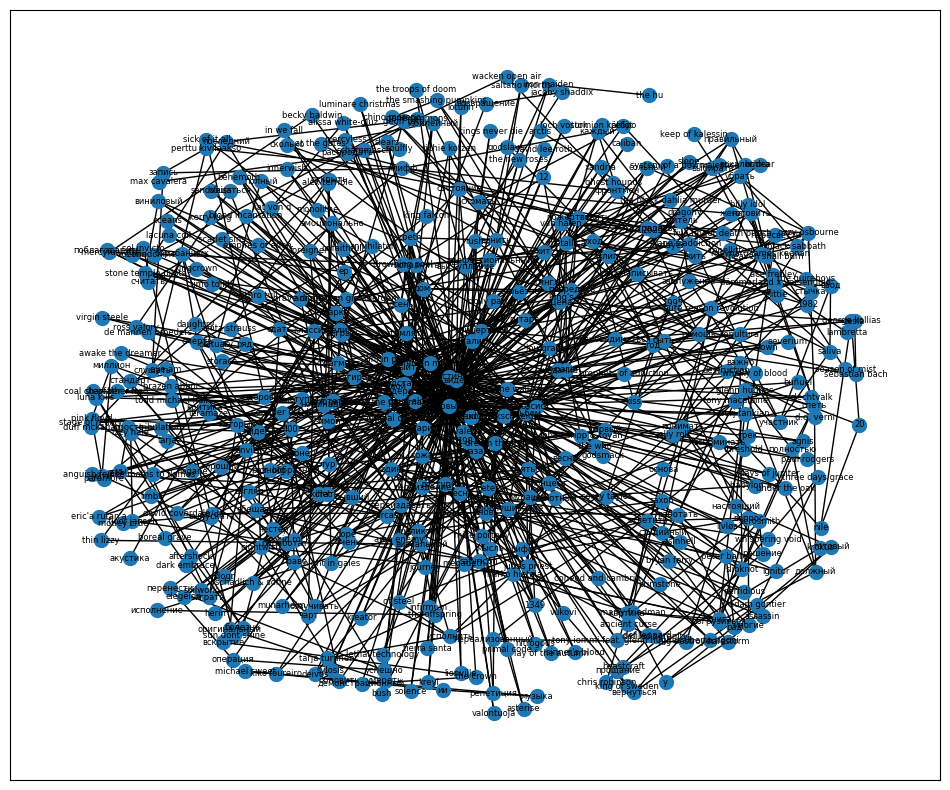

In [ ]:
# Визуализация графа
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx(G, pos, with_labels=True, node_size=100, font_size=6)
plt.show()

Чересчур много понятий, поэтому нужно попытаться визуализировать схему другим средством - модулем Network библиотеки pyvis. Он сохраняет граф в html-документ, который потом можно открыть отдельно или сохранить.

При открытии лучше поставить флажок возле enabled внизу экрана - это активирует внутреннюю физику и сделает отображение чуть более понятным. Вершины начнут "разлетаться", как частицы при взрыве. После этого нужно либо убрать флажок сразу, либо подождать оптимального "разлёта". Также можно закомментировать строку
```python
net.toggle_physics(False)
```
Физика будет включена по умолчанию, а при открытии можно будет увидеть понятно выглядящий граф. Однако в таком случае время открытия файла graph.html увеличится в несколько раз.

Зададим параметры:

In [ ]:
net = Network()  # создаём объект графа
# net.set_edge_smooth('dynamic')
net.from_nx(G)
net.toggle_physics(False)
net.show_buttons(filter_=["physics"])
net.barnes_hut(central_gravity=0.7, gravity=-6000)
net.show('graph.html', notebook=False)  # сохраняем в 'graph.html'

graph.html


Если не открывает по ссылке, то можно скачать и открыть отдельно.

In [ ]:
# Отобразить ссылку
HTML('<a href="graph.html" target="_blank">Открыть</a>')

Поиск центральных слов

In [ ]:
# Рассчет центральности (PageRank)
pagerank = nx.pagerank(G)

# Выводим топ-5 самых важных слов
top_words = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]
print("Топ-5 ключевых слов:")
for word, score in top_words:
    print(f"{word}: {score}")

Топ-5 ключевых слов:
новый: 0.05762197047740535
видео: 0.05390240357114721
альбом: 0.01924729490181594
вокалист: 0.013408675689698309
песня: 0.00934373856244697


Поиск сообществ в графе

In [ ]:
# Поиск сообществ методом Лувена
communities_generator = community.louvain_communities(G, weight='weight')

# Выводим найденные сообщества
for i, community_group in enumerate(communities_generator):
    print(f"Сообщество {i + 1}: {', '.join(community_group)}")

Сообщество 1: основа, tony macalpine, рифф, картина
Сообщество 2: открыть, duff mckagan, def leppard, тур
Сообщество 3: должный, tarja, сцена, van halen, glenn hughes, bridear, maynard james keenan, убрать, kiss, погрузиться, hagane, jelly roll, black sabbath, sebastian bach, billy idol, клип, 1982, the smashing pumpkins, 1981, chino moreno, 1995, присоединиться, nile, полностью, tesla, ace frehley, уход, спеть, ozzy osbourne, george kollias, год, kreator, rush, saltatio mortis, 20, концертный
Сообщество 4: марка, 12, the who
Сообщество 5: sol invicto, выпускать, ер
Сообщество 6: robert fripp & toyah, becky baldwin, хит, anneke van giersbergen, slayer, gerry and the pacemakers, majestica, dolly parton, mercyful fate, исполнять
Сообщество 7: очень, пластинка, обещать, разнообразный, satyricon
Сообщество 8: решение, понимать, aerosmith, chris robinson
Сообщество 9: paramore, king falcon
Сообщество 10: kittie, cannibal corpse, повредить, жить, ураган, правильный, серьёзно, anvil, пострада

## Этап 5: Комплексная визуализация

1. Соберите все результаты предыдущих этапов (гистограмму частот тем, анализ тональности, граф связей).
2. Визуализируйте их на одном интерактивном дашборде с использованием `Plotly` или `Dash`.
3. Реализуйте возможность фильтрации данных по дате публикации или ключевым темам.

**Результат:** Интерактивный дашборд с визуализацией анализа новостных данных.

---

На этом этапе мы объединим результаты предыдущих анализов (числовых данных, текстовых данных и графов) и создадим комплексную визуализацию. Визуализация играет важную роль в том, чтобы облегчить интерпретацию сложных данных, помогая нам выявлять закономерности и делать выводы.

В этом блоке мы используем библиотеки **Matplotlib**, **Seaborn** и **Plotly** для создания графиков, отображающих результаты анализа текстов и данных новостных заголовков.

### Теоретические основы

Визуализация данных — это процесс представления данных в виде графиков, диаграмм, карт и других визуальных форм. Хорошо подобранная визуализация помогает:
1. Увидеть тренды и закономерности в данных.
2. Поддержать принятие решений на основе данных.
3. Упростить понимание сложных связей между элементами данных.

Основные типы визуализаций:
- **Гистограммы** и **диаграммы распределения** для числовых данных.
- **Wordcloud** (облака слов) для текстов.
- **Графы** для взаимосвязей между элементами.

### Полезные материалы:
1. [Документация Matplotlib](https://matplotlib.org/stable/index.html)
2. [Seaborn для визуализации данных](https://seaborn.pydata.org/)
3. [Plotly для интерактивных графиков](https://plotly.com/python/)

### Пример 1: Визуализация распределения по категориям

Первое, что стоит сделать, — это визуализировать распределение новостей по категориям. Для этого мы можем построить гистограмму, чтобы увидеть, какие категории новостей наиболее распространены.

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('sarbc_news_data.csv')

# Визуализация распределения новостей по категориям
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title('Распределение новостей по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество новостей')
plt.xticks(rotation=45)
plt.show()
```

#### Описание кода:
1. **Countplot**: Построение гистограммы для подсчета количества новостей в каждой категории.
2. **Seaborn**: Мы используем библиотеку Seaborn для создания красивых и информативных графиков.

### Пример 2: Визуализация ключевых слов с использованием WordCloud

Для текстовых данных полезно визуализировать ключевые слова, которые встречаются в заголовках новостей. Для этого применим **WordCloud**.

```python
from wordcloud import WordCloud

# Создание строки с заголовками
all_titles = ' '.join(df['Title'])

# Построение облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Визуализация облака слов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для заголовков новостей')
plt.show()
```

#### Описание кода:
1. **WordCloud**: Мы используем WordCloud для визуализации частоты слов в заголовках. Чем чаще слово встречается, тем больше оно отображается в облаке.

### Пример 3: Визуализация графа связей между словами

Графы являются важным элементом для отображения сложных взаимосвязей между элементами. На предыдущем этапе мы уже построили граф слов, теперь визуализируем его.

```python
import networkx as nx

# Построение графа (используем данные с предыдущих этапов)
G = nx.Graph()

# Добавляем ребра в граф на основе связей между словами
for title in df['Lemmatized_Title']:
    words = title.split()  # Разделение на слова
    for i in range(len(words)-1):
        G.add_edge(words[i], words[i+1])

# Визуализация графа
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx(G, pos, with_labels=True, node_size=30, font_size=10, edge_color='gray')
plt.title('Граф связей между словами')
plt.show()
```

#### Описание кода:
1. **NetworkX**: Используем NetworkX для построения графа связей между словами.
2. **Визуализация графа**: Отображаем граф, показывая узлы (слова) и рёбра (связи между ними).

### Пример 4: Комплексная интерактивная визуализация с Plotly

Для интерактивной визуализации числовых данных, таких как время публикации новостей, удобно использовать Plotly. Например, можно построить интерактивную линию времени, чтобы увидеть, как распределяются новости по времени.

```python
import plotly.express as px

# Преобразуем столбец Time Published в формат времени
df['Time Published'] = pd.to_datetime(df['Time Published'], format='%H:%M', errors='coerce')

# Визуализация временного распределения новостей
fig = px.line(df, x='Time Published', y=df.index, title='Распределение новостей по времени публикации')
fig.update_layout(xaxis_title='Время', yaxis_title='Количество новостей', showlegend=False)
fig.show()
```

#### Описание кода:
1. **Plotly Express**: Используем Plotly Express для создания интерактивного графика, который показывает, когда были опубликованы новости.
2. **Время публикации**: Преобразуем данные о времени публикации в формат времени, чтобы построить график.

### Итоги

На этом этапе вы научились использовать несколько методов визуализации:
1. **Гистограмма** для отображения распределения новостей по категориям.
2. **WordCloud** для визуализации ключевых слов в заголовках новостей.
3. **Граф** для отображения связей между словами.
4. **Интерактивный график** с помощью Plotly для анализа временных данных.

Теперь вы можете применить эти методы для комплексного анализа и визуализации новостных данных. Важно выбирать правильные инструменты для каждого типа данных, чтобы максимально эффективно передать информацию.

## Реализация этапа 5

In [ ]:
# Ваша реализация 5-го этапа
fig = px.histogram(df, x='Date', title='Распределение новостей по дате публикации')
fig.update_layout(xaxis_title='Дата', yaxis_title='Количество новостей', showlegend=False)
fig.show()

Самые часто встречающиеся группы, фестивали (word_frequencies)

In [ ]:
dict_names = {}
for name in word_frequencies.keys():
  if bool(re.fullmatch(r'[A-Za-z0-9/]+', name)): # только английские символы, цифры или /
    dict_names[name] = word_frequencies[name]
print(dict_names)

{'12': 1, 'metallica': 7, 'rush': 1, '1981': 1, 'kittie': 1, 'cavalera': 1, 'sepultura': 1, 'aerosmith': 1, 'storace': 1, 'klogr': 1, 'paramore': 1, 'monolithe': 1, 'opeth': 2, 'saliva': 1, 'kiss': 2, '1982': 1, '20': 1, 'nile': 1, 'teramaze': 2, 'tribulation': 1, 'sylosis': 1, 'threshold': 1, 'impellitteri': 1, '1349': 1, 'ignitor': 1, 'dope': 1, 'perfidious': 1, 'peter': 1, 'nitrogods': 1, 'aftershock': 1, 'unfaithfull': 1, '1995': 1, 'foreigner': 1, 'carcass': 1, 'deivos': 1, 'aeverium': 1, 'krokus': 1, 'innerwish': 1, 'mindcrime': 1, 'bridear': 1, 'assassin': 1, 'ac/dc': 1, 'lionville': 1, 'annihilator': 1, 'anvil': 3, 'bush': 1, 'slope': 1, 'kozoria': 1, '400': 1, 'slechtvalk': 1, 'slipknot': 1, 'behemoth': 1, 'iotunn': 1, 'oceans': 1, 'caliban': 1, 'kingcrown': 1, 'xandria': 1, 'soilwork': 1, 'slayer': 1, 'elegeion': 1, 'tesla': 1, 'down': 1, 'nightwish': 2, 'solence': 1, 'kreyl': 1, 'valontuoja': 1, 'destruction': 1, 'godslave': 1, 'beastcraft': 1, 'megadeth': 1, 'skillet': 2, '

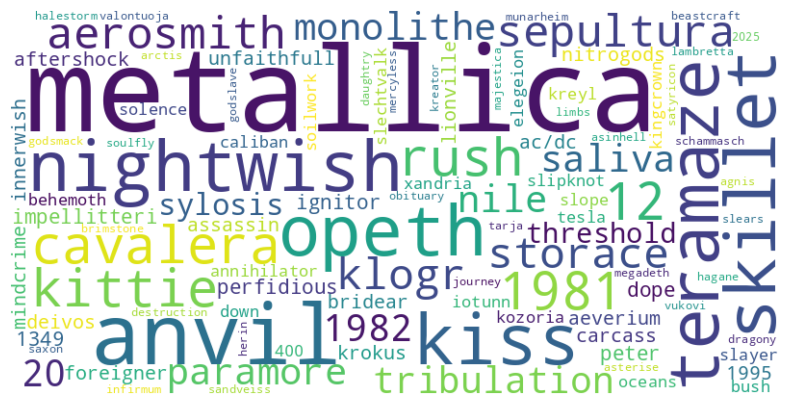

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict_names)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# dict_names = dict(sorted(dict_names.items(), key=lambda item: item[1], reverse=True))
list_names = sorted(dict_names.items(), key=lambda item: item[1], reverse=True)
dict_names_short = dict(list_names[:7]) # словарь из первых 7 элементов
dict_names_short

{'metallica': 7,
 'anvil': 3,
 'opeth': 2,
 'kiss': 2,
 'teramaze': 2,
 'nightwish': 2,
 'skillet': 2}

In [ ]:
all_dates = df['Date'].unique().tolist() # список названий самых популярных групп

In [ ]:
dict_dates = {}
for d in all_dates:
  dict_dates[d] = np.array([], dtype=np.int64)

In [ ]:
for name in dict_names_short:
  for date in dict_dates.keys():
    dict_dates[date] = np.append(dict_dates[date], 0)
  for line in range(len(df['Lemmatized_Title'])):
    if name in df['Lemmatized_Title'][line]:
      dict_dates[df['Date'][line]][-1] += 1
dict_dates

{'2024-10-06': array([2, 0, 0, 0, 0, 0, 0]),
 '2024-10-05': array([1, 0, 1, 1, 1, 0, 0]),
 '2024-10-04': array([1, 0, 0, 0, 0, 0, 0]),
 '2024-10-03': array([0, 2, 1, 0, 0, 0, 0]),
 '2024-10-02': array([1, 0, 0, 0, 0, 1, 1]),
 '2024-10-01': array([1, 1, 0, 1, 0, 1, 0]),
 '2024-09-30': array([0, 0, 0, 0, 1, 0, 0]),
 '2024-09-29': array([1, 0, 0, 0, 0, 0, 1])}

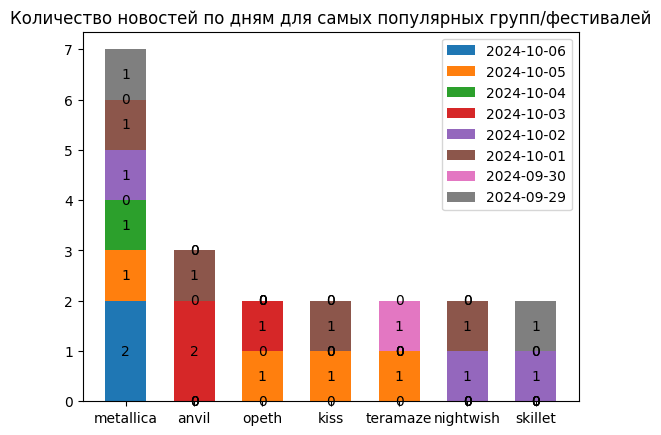

In [ ]:
fig, ax = plt.subplots()
bottom = np.zeros(len(dict_names_short.keys()))
width = 0.6

for date, number_massive in dict_dates.items():
    p = ax.bar(dict_names_short.keys(), number_massive, width, label=date, bottom=bottom)
    bottom += number_massive
    ax.bar_label(p, label_type='center')

ax.set_title('Количество новостей по дням для самых популярных групп/фестивалей')
ax.legend()

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e47e6484-8d7e-49f8-bcf3-6c9ac0544766' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>